In [1]:
%load_ext autoreload
%autoreload 2

from simulation_loader import MongoLoader
from dotenv import find_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
sim:pd.DataFrame
mongo_loader = MongoLoader(path=find_dotenv())    

with mongo_loader as loader:
    sim = loader.retrieve_simulations()
    
filteredSims = MongoLoader.withTags(sim, ['baseConfig'])
MongoLoader.addAggregation(filteredSims, 'out.xtes')
MongoLoader.addFps(filteredSims)
filteredSims.head()

,in.map_size,in.initial_position,in.maxSpeed,in.minSpeed,in.maxTime,in.maxXTE,in.segLength,in.angles,out.elapsedTime,out.iterations,out.positions,out.speeds,out.xtes,out.steerings,out.throttles,out.road,tags,out.xtes.avg,fps
_id,,,,,,,,,,,,,,,,,,,
68b0d698e5bd1f9d987bcf9d,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 0, 0, 0, 0]",8.876690,41,"[[125.5309, 0.0, 1.7132], [125.5309, 0.0, 1.71...","[0.0, 0.0, 0.0, 4.07268, 7.84944, 11.1888, 13....","[0.0, 0.0, 0.0, 0.0031, 0.0043, 0.0049, 0.0054...","[0.0932060182094574, -0.003117605112493038, -0...","[0.9913126230239868, 0.9999902844429016, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...","[baseConfig, v0]",0.550085,4.618839
68b0dda0e5bd1f9d987bcf9f,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 0, 0, 0, 0]",9.313298,41,"[[125.5266, 0.0003, 1.7132], [125.5266, 0.0003...","[0.0, 0.0, 0.0, 2.93832, 6.21936, 9.21456, 12....","[-0.0003, -0.0003, -0.0003, -0.0004, -0.0008, ...","[0.0175800584256649, -0.006676949560642242, -0...","[0.9996909499168396, 0.999955415725708, 0.9999...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...","[baseConfig, v0]",0.373751,4.402307
68b0dda0e5bd1f9d987bcfa0,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 0, 0, 0, 0]",7.948635,32,"[[125.5271, 0.0, 1.7132], [125.5271, 0.0, 1.71...","[0.0, 0.0, 0.0, 4.039560000000001, 8.16588, 11...","[0.0, 0.0, 0.0, -0.0002, -0.0008, -0.0019, -0....","[-0.016103975474834442, -0.005595340393483639,...","[0.9997406601905823, 0.9999687075614929, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...","[baseConfig, v0]",0.519634,4.025849
68b0dda0e5bd1f9d987bcfa1,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 0, 0, 0, 0]",8.293685,39,"[[125.5271, 0.0, 1.7132], [125.5271, 0.0, 1.71...","[0.0, 0.0, 0.0, 3.35916, 7.48944, 12.579120000...","[0.0, 0.0, 0.0, -0.0002, -0.0008, -0.0023, -0....","[-0.007589444518089294, -0.005593298934400082,...","[0.999942421913147, 0.9999687075614929, 0.9999...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...","[baseConfig, v0]",0.551141,4.702373
68b0dda0e5bd1f9d987bcfa2,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 0, 0, 0, 0]",8.282520,40,"[[125.5271, 0.0, 1.7132], [125.5271, 0.0, 1.71...","[0.0, 0.0, 0.0, 3.29148, 6.62292, 10.35288, 13...","[0.0, 0.0, 0.0, 0.0003, 0.0001, -0.0007, -0.00...","[0.014520389959216118, -0.005755516700446606, ...","[0.9997891783714294, 0.9999668598175049, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...","[baseConfig, v0]",0.486090,4.829448


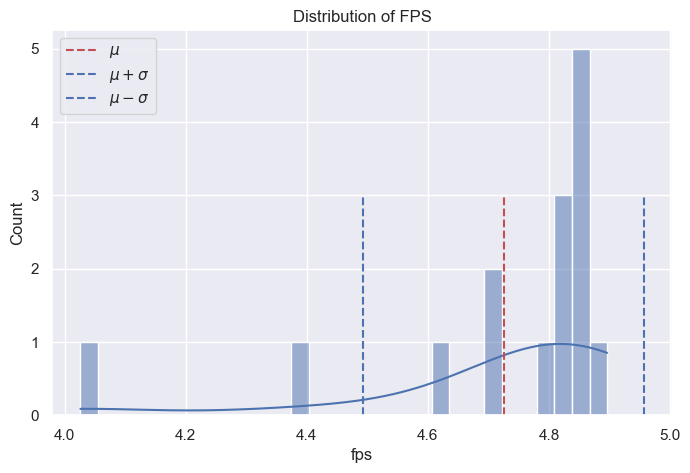

In [3]:
from simulation_analysis.Plotter import plotDistribution

plotDistribution(filteredSims['fps'], 'Distribution of FPS', 'fps', 'Count')

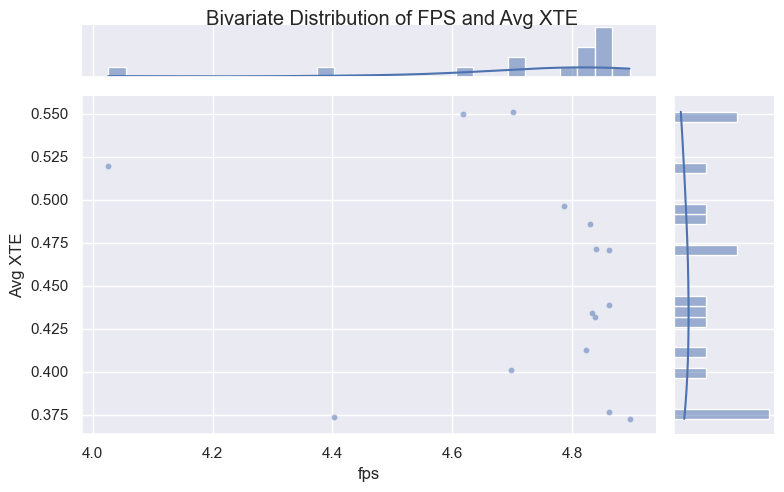

In [4]:
from simulation_analysis.Plotter import plotBivariateDistribution

plotBivariateDistribution(filteredSims['fps'], filteredSims['out.xtes.avg'], 'Bivariate Distribution of FPS and Avg XTE', 'fps', 'Avg XTE')

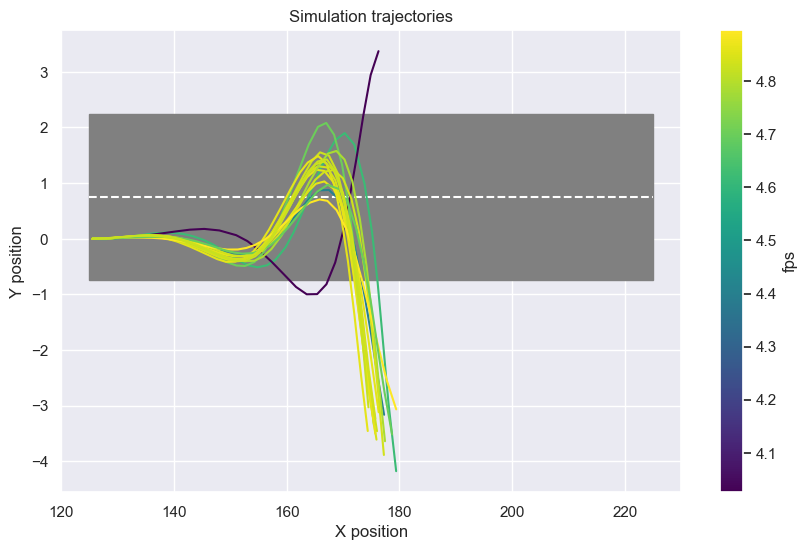

In [5]:
from simulation_analysis.Plotter import plotTrajectoriesOfARoad

plotTrajectoriesOfARoad(
    roadControlPoints=filteredSims.iloc[0]['out.road'],
    trajectories=filteredSims['out.positions'].tolist(),
    trajectoriesColor=filteredSims['fps'].tolist(),
    trajectoriesColorName='fps'
)
plt.show()

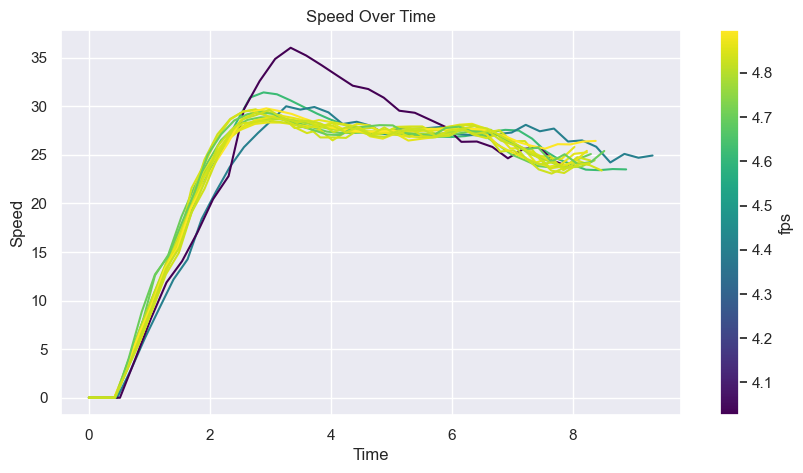

In [6]:
from simulation_analysis.Plotter import plotTimeSeries

plotTimeSeries(
    filteredSims['out.speeds'].tolist(),
    elapsedTimes=filteredSims['out.elapsedTime'].tolist(),
    title="Speed Over Time",
    ylabel="Speed",
    legend=False,
    color=filteredSims['fps'].tolist(),
    colorName='fps'
)

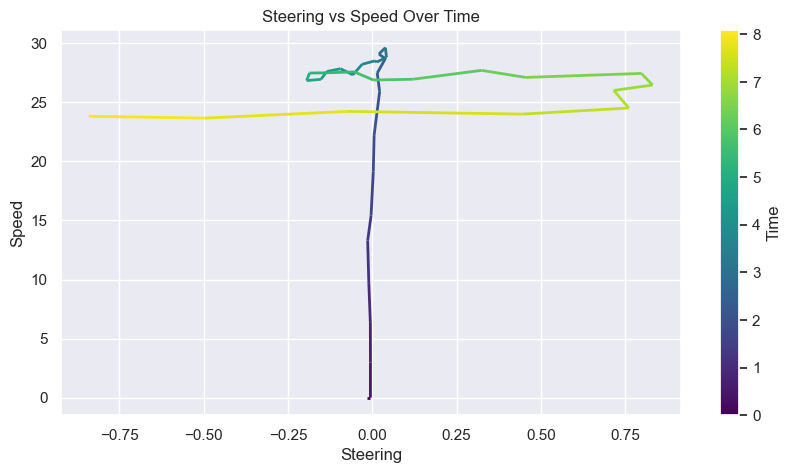

In [20]:
from simulation_analysis.Plotter import plotBivariateTimeSeries

index = -1
plotBivariateTimeSeries(
    xSeries=[filteredSims['out.steerings'].iloc[index]],
    ySeries=[filteredSims['out.speeds'].iloc[index]],
    elapsedTimes=[filteredSims['out.elapsedTime'].iloc[index]],
    title="Steering vs Speed Over Time",
    xlabel="Steering",
    ylabel="Speed",
    legend=False
)